# Vehicle Price Prediction With Neural networks

Our data is taken from "https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes" on the Kaggle platform. Our dataset consists of 100,000 used car information used in the UK. The dataset consists of different car models. In the study, Mercedes brand automobile data were discussed.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings as w
w.filterwarnings('ignore')

We load the dataset from excel.

In [6]:
dataFrame= pd.read_excel("merc.xlsx")

In [7]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


The data set consists of 13119 rows of data and 6 different variables. Our variables are year (year), car sales price (price), car's gear type (transmission), tax amount (tax) and Engine Size (EngineSize).

In [8]:
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


## Make Sense of Data

In [9]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


We check for missing data in the Dataset and none of the variables appear to have missing data.

In [10]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

### Graphical Inferences

Charts provide important clues in our data approach. We examine the graph of the variable of car prices that we are going to predict. When vehicle prices are examined, there are residual data that may cause deviations in the range of 75,000-150,000 TL. These values may cause deviations in our estimates..

<AxesSubplot:xlabel='price', ylabel='Density'>

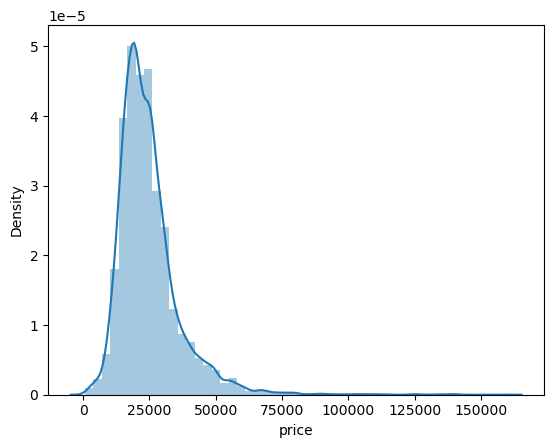

In [13]:
sbn.distplot(dataFrame["price"])


Looking at the distribution of automobiles by years, it is seen that most of the automobile data belong to 2019.

<AxesSubplot:xlabel='year', ylabel='count'>

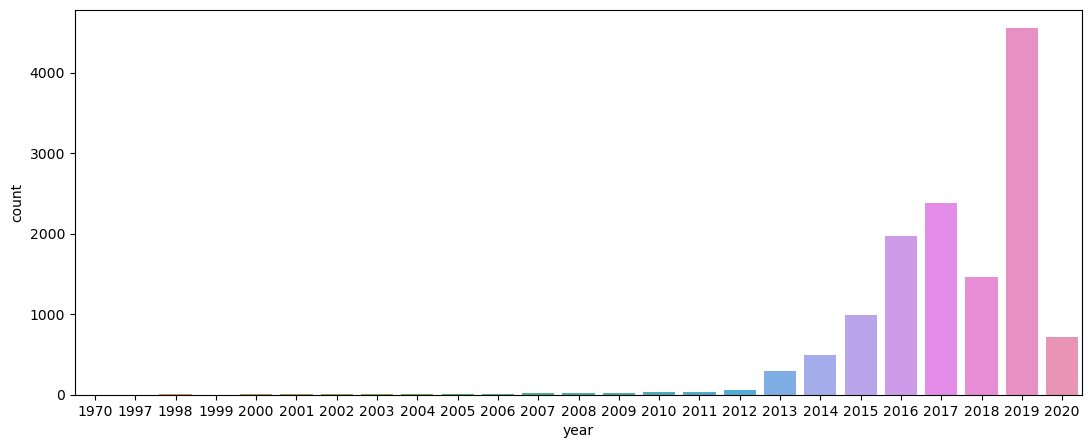

In [16]:
plt.figure(figsize=(13,5))

sbn.countplot(dataFrame["year"])


### Relationships Between Variables

The relations of the variables with each other are given.

In [20]:
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


When we examined the relationship between automobile prices, which is our dependent variable, and other variables in our model, it was seen that there was a positive correlation with the year and engine power. In other words, the prices of cars increase as the year they are produced and the engine power increases. Another noteworthy inference was the tax rate. The higher the tax rate, the higher the price. As car mileage and fuel consumption increase, car prices decrease.

In [21]:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

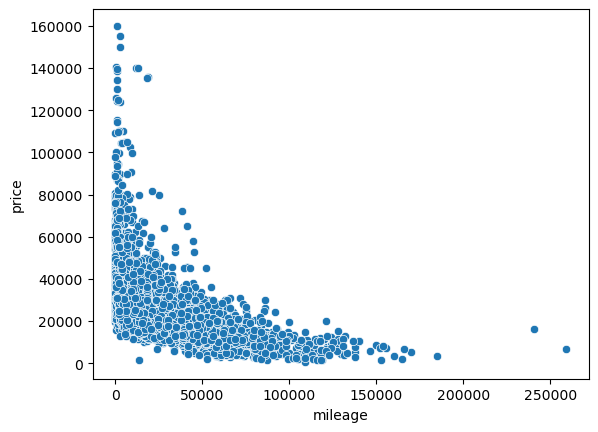

In [22]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

In [23]:
dataFrame.sort_values("price",ascending= False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [24]:
dataFrame.sort_values("price",ascending= True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [25]:
len(dataFrame)

13119

In [27]:
len(dataFrame)*0.01

131.19

## Data Cleaning

We perform a 1% subtraction from the data set.

In [18]:
yuzdeDoksanDokuzDataFrame=dataFrame.sort_values("price",ascending= False).iloc[131:]

It is seen below that when the 1% residual of the data set is removed, the data set approaches the normal distribution.

<Figure size 700x500 with 0 Axes>

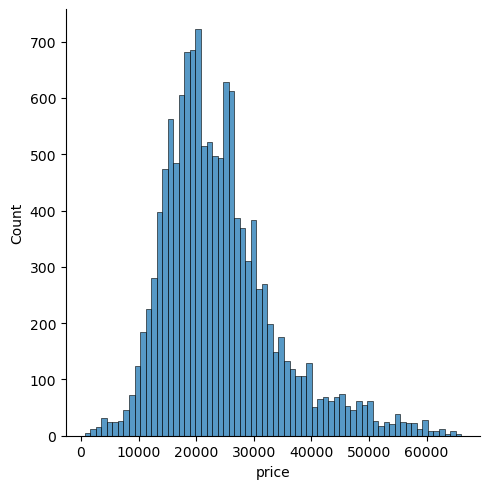

In [32]:
plt.figure(figsize=(7,5))
sbn.displot(yuzdeDoksanDokuzDataFrame["price"])


In our data set, there is a difference in the average of the data for 1970 compared to other years. The reason for this is that a few 1970 model cars show an imbalance in price-average age matching due to special reasons (antiques, etc.).

In [33]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [35]:
dataFrame=yuzdeDoksanDokuzDataFrame

The 1970 data were removed from the dataset to bring it to a more accurate point where it could be estimated from the dataset.

In [36]:
dataFrame = dataFrame[dataFrame.year != 1970]

## Model Making

The categorical variable gear type was removed from the variable's dataset.

In [21]:
dataFrame= dataFrame.drop("transmission",axis=1)

The dependent variable (price) of car prices is taken as a series.

In [22]:
y= dataFrame["price"].values

Other variables in the data set were taken from the series form as independent variables.

In [23]:
x= dataFrame.drop("price",axis=1).values

The activated data set of the Sklearn library was divided into two as training and testing. 70% of the data set was determined as training data and 30% as test data.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=10)

We look at how many rows of data are in the Training and Test dataset.

In [26]:
len(x_train)

9183

In [27]:
len(x_test)

3936

Min-Max normalizasyonu yapmak için sklearn kütüphanesi aktif edildi.

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
x_train = scaler.fit_transform(x_train)

In [32]:
x_test = scaler.fit_transform(x_test)

The training model consists of 5 layers, 4 normal and 1 output layer. It is designed by creating 12 neurons in the normal layer and 1 neuron in the output layer. Relu activation function is used in normal layers. In the model, "man" was used as the optimizer and the mean square error was used as the loss.

In [33]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers  import Dense

In [34]:
x_train.shape

(9183, 5)

In [35]:
model =  Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

The model will be trained with the training data. Batch_size 250 is given. Our data set will be given to the model in data groups of 250. Because giving 13,000 data to the model at the same time may cause the model to crash. In model training, iteration (epoch) 250 was given.Test data is given for validation data.

In [36]:
model.fit(x=x_train, y=y_train,epochs=300,validation_data=(x_test,y_test),batch_size=250)

Epoch 1/300
37/37 [==============================] - 1s 14ms/step - loss: 741843456.0000 - val_loss: 769870528.0000
Epoch 2/300
37/37 [==============================] - 0s 5ms/step - loss: 741823040.0000 - val_loss: 769836928.0000
Epoch 3/300
37/37 [==============================] - 0s 5ms/step - loss: 741754944.0000 - val_loss: 769713792.0000
Epoch 4/300
37/37 [==============================] - 0s 5ms/step - loss: 741505920.0000 - val_loss: 769256768.0000
Epoch 5/300
37/37 [==============================] - 0s 5ms/step - loss: 740616384.0000 - val_loss: 767715392.0000
Epoch 6/300
37/37 [==============================] - 0s 5ms/step - loss: 737920704.0000 - val_loss: 763437568.0000
Epoch 7/300
37/37 [==============================] - 0s 5ms/step - loss: 731262528.0000 - val_loss: 753683456.0000
Epoch 8/300
37/37 [==============================] - 0s 5ms/step - loss: 717238784.0000 - val_loss: 734370432.0000
Epoch 9/300
37/37 [==============================] - 0s 6ms/step - loss: 691227

Epoch 72/300
37/37 [==============================] - 0s 6ms/step - loss: 80109160.0000 - val_loss: 88793792.0000
Epoch 73/300
37/37 [==============================] - 0s 5ms/step - loss: 78848040.0000 - val_loss: 87253736.0000
Epoch 74/300
37/37 [==============================] - 0s 5ms/step - loss: 77571800.0000 - val_loss: 86179320.0000
Epoch 75/300
37/37 [==============================] - 0s 5ms/step - loss: 76343072.0000 - val_loss: 84536912.0000
Epoch 76/300
37/37 [==============================] - 0s 5ms/step - loss: 75027248.0000 - val_loss: 83173592.0000
Epoch 77/300
37/37 [==============================] - 0s 5ms/step - loss: 73766296.0000 - val_loss: 81907536.0000
Epoch 78/300
37/37 [==============================] - 0s 5ms/step - loss: 72450216.0000 - val_loss: 80058608.0000
Epoch 79/300
37/37 [==============================] - 0s 5ms/step - loss: 71151896.0000 - val_loss: 78759752.0000
Epoch 80/300
37/37 [==============================] - 0s 5ms/step - loss: 69835736.0000 

37/37 [==============================] - 0s 5ms/step - loss: 31618550.0000 - val_loss: 38231636.0000
Epoch 215/300
37/37 [==============================] - 0s 5ms/step - loss: 31627954.0000 - val_loss: 38454880.0000
Epoch 216/300
37/37 [==============================] - 0s 5ms/step - loss: 31592392.0000 - val_loss: 38268544.0000
Epoch 217/300
37/37 [==============================] - 0s 5ms/step - loss: 31551452.0000 - val_loss: 38047464.0000
Epoch 218/300
37/37 [==============================] - 0s 5ms/step - loss: 31559980.0000 - val_loss: 38270892.0000
Epoch 219/300
37/37 [==============================] - 0s 5ms/step - loss: 31519490.0000 - val_loss: 37695976.0000
Epoch 220/300
37/37 [==============================] - 0s 5ms/step - loss: 31503072.0000 - val_loss: 37731220.0000
Epoch 221/300
37/37 [==============================] - 0s 5ms/step - loss: 31493366.0000 - val_loss: 37262088.0000
Epoch 222/300
37/37 [==============================] - 0s 5ms/step - loss: 31522344.0000 - val

## Evaluation of Results

Let's examine the losses for training and test data

In [37]:
kayipVerisi =pd.DataFrame(model.history.history)

In [38]:
kayipVerisi.head()

,loss,val_loss
0,741843456.0,769870528.0
1,741823040.0,769836928.0
2,741754944.0,769713792.0
3,741505920.0,769256768.0
4,740616384.0,767715392.0


Let's examine the graphs of losses.

<AxesSubplot:>

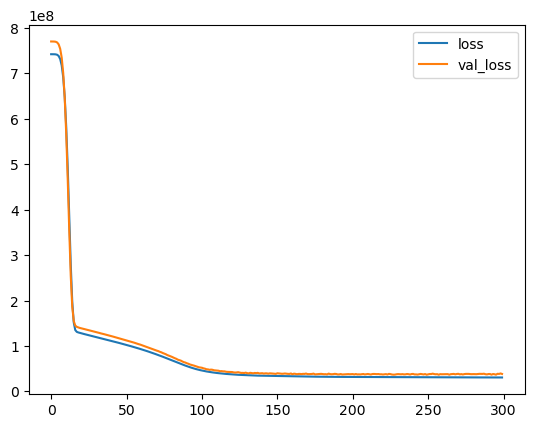

In [39]:
kayipVerisi.plot()

When we look at the "lost" values of the Training and Test data, it started around 7 in the first iteration and decreased to 1 "loss" in the 25th iteration. From the 25th iteration to the 150th iteration, the "loss" decreased by 0.2. 150th to 300th iteration "losses" of training and test data went in the same direction and there were no overfitting events.

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [41]:
tahminDizisi= model.predict(x_test)

123/123 [==============================] - 0s 2ms/step


In [42]:
tahminDizisi

array([[37357.363],
       [29381.277],
       [37625.246],
       ...,
       [21845.658],
       [16502.096],
       [20931.11 ]], dtype=float32)

In [43]:
mean_absolute_error(y_test,tahminDizisi)

3893.267694411239

When we compared the actual car prices with our estimate for the test data, we found an average difference of 3893 pounds. When we look at the average car prices, we found 24074 liras. According to the user of the data, it can be decided that such an error can be tolerated or further reduced.

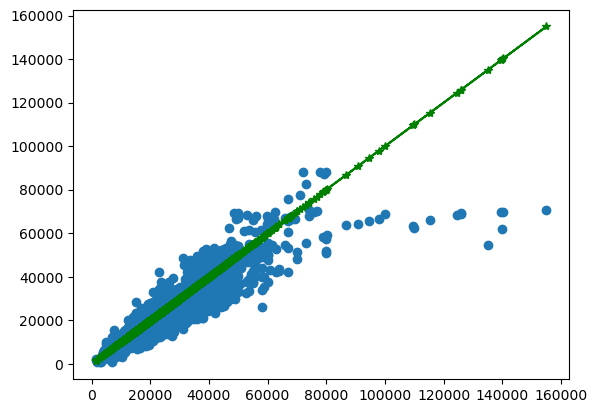

In [44]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

Conclusion: Our model can be developed according to the user. More data can be collected for this. Test and Training data rates can be changed. The number of iterations can be increased. The number of neurons and layers can be increased.